# Automated Software Improvement: A Machine Learning Solution
## Explainability Notebook
### 2727141 Luke Skinner
### Supervisor: Dr Sandy Brownlee

## Overview

This notebooks purpose is to house all Explainability for the models which were built to predict the targets. Most of these were already included it the iterations for each target. However, they are collected here so they can be viewed in one place. This will load the most recent version of the dataset.

#### Imports

In [5]:
import seaborn as sns 
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, RandomizedSearchCV
import numpy as np
import matplotlib as plt
from scipy.stats import loguniform
import statsmodels.api as sma
import shap

#### Utility Functions

In [6]:
def cacl_adj_r2(r2, n, k):
    """
    Calculates the adjusted r2 score based on the following formula:
    Adjusted r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1). This is used to
    complement the original r2 score to give a better understanding of
    how the model explains variance of the predictor variables

    Parameters:
        r2 (float): The original r2 score (from sklearn)
        n (int): The number of observations
        k (int): The number of predictor variables

    Returns:
        adj_r2 (float): The adjusted r2 score 
    """
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def calc_p_value(X, y):
    X2 = sma.add_constant(X)
    
    return sma.OLS(y, X2)
    

#### Load Dataset

In [7]:
df = pd.read_csv('data/merged_stats_sb_17112020_iter2.csv')

### Target 1 Prop Line Passed

In [26]:
# Lets remove the non numerical fields as they are not useful for the model
df_new = df.drop(['CompositeKey', 'Project', 'MethodName', 'MethodIndex'], axis=1)

df_new.info() 

# We will filter out all rows which have a numLines < 10, we also want to only look at rows with sensible npath & avedefdistuse values
df_new = df_new[(df_new.numLines > 10) & (df_new.npath > -1)]

df_new.info()

targetName="PropLinePassed"

featureNames=df_new.columns[df_new.columns != targetName]

X = df_new[featureNames]

y = df_new[targetName]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numLines                    2157 non-null   int64  
 1   numStatements               2157 non-null   int64  
 2   EditDensity                 2157 non-null   float64
 3   AveUseDefDist               2157 non-null   float64
 4   NotDeclared                 2157 non-null   int64  
 5   AveUseDefDist/MethodLength  2157 non-null   float64
 6   MedDefUseDist               2157 non-null   float64
 7   MedUseDefDist/MethodLength  2157 non-null   float64
 8   CountLine                   2157 non-null   int64  
 9   CompiledLine                2157 non-null   int64  
 10  PassedLine                  2157 non-null   int64  
 11  CountStat                   2157 non-null   int64  
 12  CompiledStat                2157 non-null   int64  
 13  PassedStat                  2157 

In [27]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [52]:
print("Prop Line Passed Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model_lr.coef_[i].round(4))

Prop Line Passed Model coefficients:

numLines = -0.0004
numStatements = -0.0006
EditDensity = -0.0001
AveUseDefDist = -0.0001
NotDeclared = -0.0065
AveUseDefDist/MethodLength = 0.0097
MedDefUseDist = -0.0003
MedUseDefDist/MethodLength = -0.0079
CountLine = 0.0002
CompiledLine = -0.0128
PassedLine = 0.0254
CountStat = 0.0002
CompiledStat = 0.0035
PassedStat = -0.0092
PropLineCompiled = 0.5725
PropStatCompiled = -0.1639
PropStatPassed = 0.3617
cyclomatic = 0.0002
ncss = 0.0014
npath = 0.0
cyc/length = -0.0031
ncss/length = -0.0289
npath/length = -0.0001
InstCoverage-missed = 0.0001
InstCoverage-covered = -0.0001
InstCoverage = 0.0134
surfaceIfs = -0.0017
nestedIfs = -0.0014
surfaceSwitches = 0.0055
nestedSwitches = -0.0011
surfaceFors = 0.0097
nestedFors = 0.008
surfaceForEachs = 0.007
nestedForEachs = 0.004
surfaceWhiles = 0.0002
nestedWhiles = -0.0084
surfaceDos = -0.0453
nestedDos = 0.0177
iterativeStmts = -0.0072
conditionalStmts = 0.0013


In [28]:
model_rf = RandomForestRegressor(n_estimators = 100)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

#### Linear Regression - Surface Fors

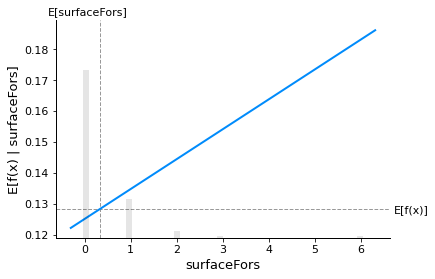

In [7]:
X100 = shap.utils.sample(X_train, 100) 
shap.plots.partial_dependence(
    "surfaceFors", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Random Forest - Surface Fors

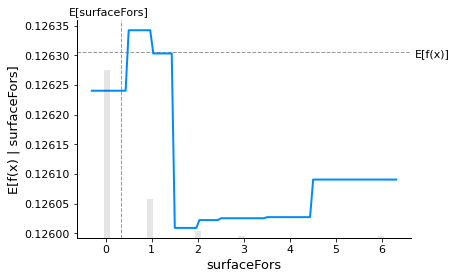

In [8]:
X100 = shap.utils.sample(X_train, 100) 
shap.plots.partial_dependence(
    "surfaceFors", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Linear Regression - Surface Ifs

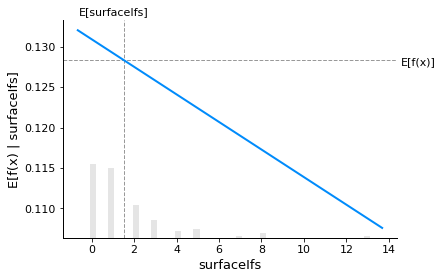

In [20]:
X100 = shap.utils.sample(X_train, 100) 
shap.plots.partial_dependence(
    "surfaceIfs", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Random Forest - Surface Ifs

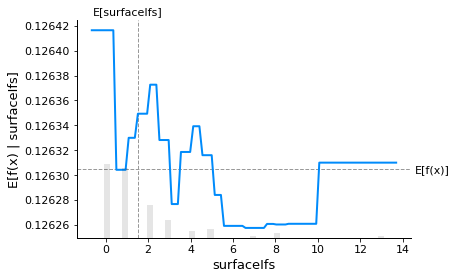

In [21]:
X100 = shap.utils.sample(X_train, 100) 
shap.plots.partial_dependence(
    "surfaceIfs", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Linear Regression - Surface Switches

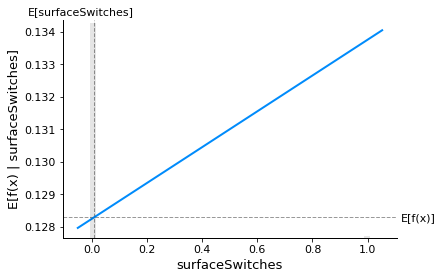

In [11]:
X100 = shap.utils.sample(X_train, 100) 
shap.plots.partial_dependence(
    "surfaceSwitches", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Random Forest - Surface Switches

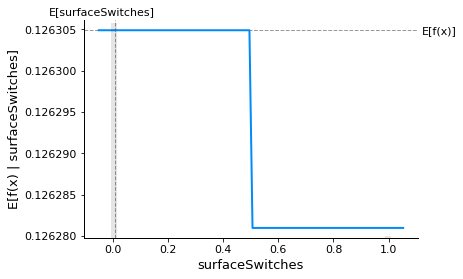

In [12]:
X100 = shap.utils.sample(X_train, 100) 
hap.plots.partial_dependence(
    "surfaceSwitches", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Linear Regression - Surface Dos

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


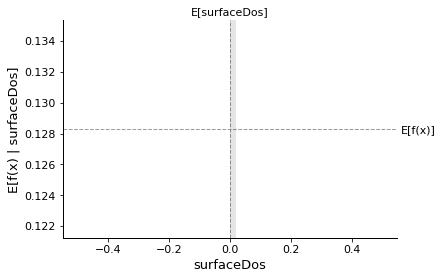

In [14]:
X100 = shap.utils.sample(X_train, 100) 
shap.plots.partial_dependence(
    "surfaceDos", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Random Forest - Surface Dos

Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


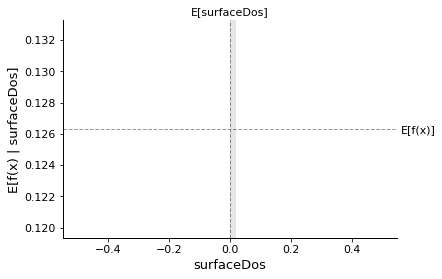

In [15]:
X100 = shap.utils.sample(X_train, 100) 
shap.plots.partial_dependence(
    "surfaceDos", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Linear Regression - Nested Ifs

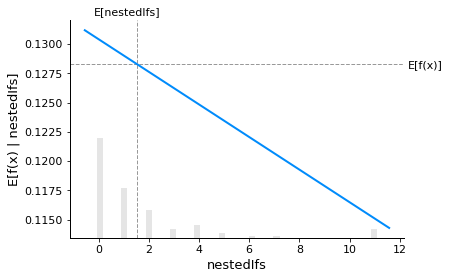

In [16]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "nestedIfs", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

#### Random Forest - Nested Ifs

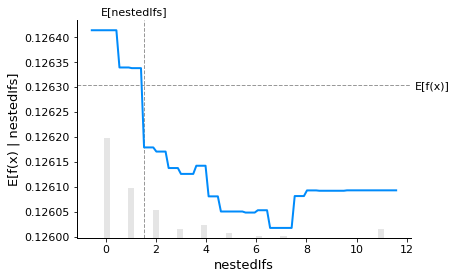

In [17]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "nestedIfs", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

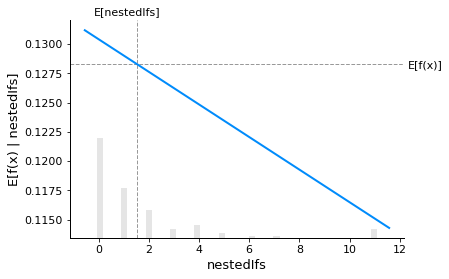

In [15]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "nestedIfs", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

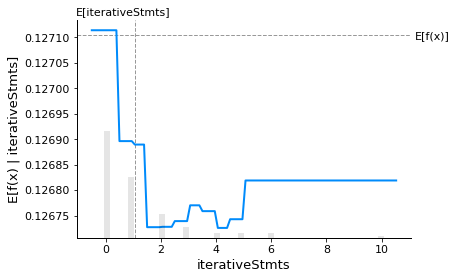

In [29]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

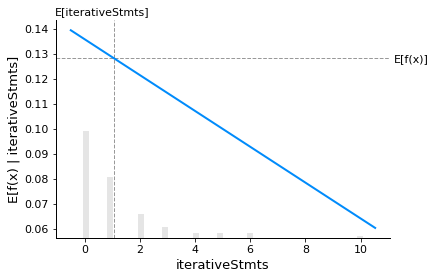

In [30]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

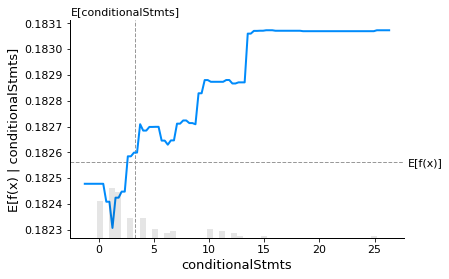

In [21]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

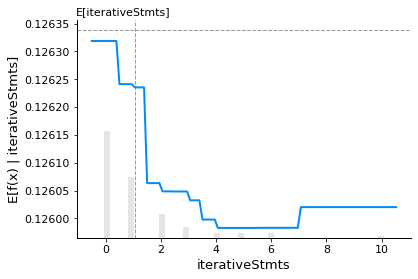

In [14]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

### Target 2 Prop Line Compiled

In [16]:
# Lets remove the non numerical fields as they are not useful for the model
df_new = df.drop(['CompositeKey', 'Project', 'MethodName', 'MethodIndex'], axis=1)

df_new.info() 

# We will filter out all rows which have a numLines < 10, we also want to only look at rows with sensible npath & avedefdistuse values
df_new = df_new[(df_new.numLines > 10) & (df_new.npath > -1)]

df_new.info()

targetName="PropLineCompiled"

featureNames=df_new.columns[df_new.columns != targetName]

X = df_new[featureNames]

y = df_new[targetName]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numLines                    2157 non-null   int64  
 1   numStatements               2157 non-null   int64  
 2   EditDensity                 2157 non-null   float64
 3   AveUseDefDist               2157 non-null   float64
 4   NotDeclared                 2157 non-null   int64  
 5   AveUseDefDist/MethodLength  2157 non-null   float64
 6   MedDefUseDist               2157 non-null   float64
 7   MedUseDefDist/MethodLength  2157 non-null   float64
 8   CountLine                   2157 non-null   int64  
 9   CompiledLine                2157 non-null   int64  
 10  PassedLine                  2157 non-null   int64  
 11  CountStat                   2157 non-null   int64  
 12  CompiledStat                2157 non-null   int64  
 13  PassedStat                  2157 

In [18]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [20]:
model_rf = RandomForestRegressor(n_estimators = 100)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
print("Prop Line Compiled Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model_lr.coef_[i].round(4))

Prop Line Passed Model coefficients:

numLines = -0.0004
numStatements = -0.0006
EditDensity = -0.0001
AveUseDefDist = -0.0001
NotDeclared = -0.0065
AveUseDefDist/MethodLength = 0.0097
MedDefUseDist = -0.0003
MedUseDefDist/MethodLength = -0.0079
CountLine = 0.0002
CompiledLine = -0.0128
PassedLine = 0.0254
CountStat = 0.0002
CompiledStat = 0.0035
PassedStat = -0.0092
PropLineCompiled = 0.5725
PropStatCompiled = -0.1639
PropStatPassed = 0.3617
cyclomatic = 0.0002
ncss = 0.0014
npath = 0.0
cyc/length = -0.0031
ncss/length = -0.0289
npath/length = -0.0001
InstCoverage-missed = 0.0001
InstCoverage-covered = -0.0001
InstCoverage = 0.0134
surfaceIfs = -0.0017
nestedIfs = -0.0014
surfaceSwitches = 0.0055
nestedSwitches = -0.0011
surfaceFors = 0.0097
nestedFors = 0.008
surfaceForEachs = 0.007
nestedForEachs = 0.004
surfaceWhiles = 0.0002
nestedWhiles = -0.0084
surfaceDos = -0.0453
nestedDos = 0.0177
iterativeStmts = -0.0072
conditionalStmts = 0.0013


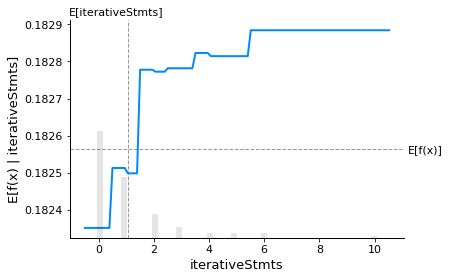

In [22]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

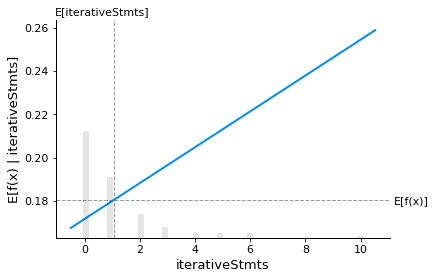

In [23]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

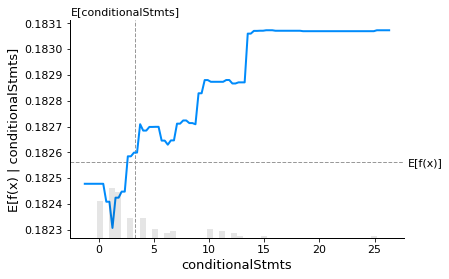

In [24]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

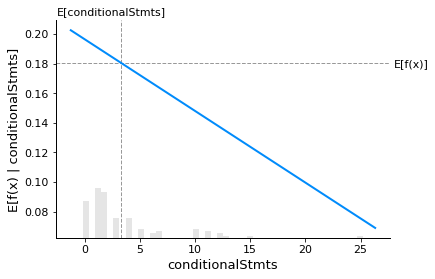

In [25]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

### Target 3 Prop Stat Passed

In [16]:
# Lets remove the non numerical fields as they are not useful for the model
df_new = df.drop(['CompositeKey', 'Project', 'MethodName', 'MethodIndex'], axis=1)

df_new.info() 

# We will filter out all rows which have a numLines < 10, we also want to only look at rows with sensible npath & avedefdistuse values
df_new = df_new[(df_new.numLines > 10) & (df_new.npath > -1)]

df_new.info()

targetName="PropStatPassed"

featureNames=df_new.columns[df_new.columns != targetName]

X = df_new[featureNames]

y = df_new[targetName]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numLines                    2157 non-null   int64  
 1   numStatements               2157 non-null   int64  
 2   EditDensity                 2157 non-null   float64
 3   AveUseDefDist               2157 non-null   float64
 4   NotDeclared                 2157 non-null   int64  
 5   AveUseDefDist/MethodLength  2157 non-null   float64
 6   MedDefUseDist               2157 non-null   float64
 7   MedUseDefDist/MethodLength  2157 non-null   float64
 8   CountLine                   2157 non-null   int64  
 9   CompiledLine                2157 non-null   int64  
 10  PassedLine                  2157 non-null   int64  
 11  CountStat                   2157 non-null   int64  
 12  CompiledStat                2157 non-null   int64  
 13  PassedStat                  2157 

In [18]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [20]:
model_rf = RandomForestRegressor(n_estimators = 100)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
print("Prop Line Compiled Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model_lr.coef_[i].round(4))

Prop Line Passed Model coefficients:

numLines = -0.0004
numStatements = -0.0006
EditDensity = -0.0001
AveUseDefDist = -0.0001
NotDeclared = -0.0065
AveUseDefDist/MethodLength = 0.0097
MedDefUseDist = -0.0003
MedUseDefDist/MethodLength = -0.0079
CountLine = 0.0002
CompiledLine = -0.0128
PassedLine = 0.0254
CountStat = 0.0002
CompiledStat = 0.0035
PassedStat = -0.0092
PropLineCompiled = 0.5725
PropStatCompiled = -0.1639
PropStatPassed = 0.3617
cyclomatic = 0.0002
ncss = 0.0014
npath = 0.0
cyc/length = -0.0031
ncss/length = -0.0289
npath/length = -0.0001
InstCoverage-missed = 0.0001
InstCoverage-covered = -0.0001
InstCoverage = 0.0134
surfaceIfs = -0.0017
nestedIfs = -0.0014
surfaceSwitches = 0.0055
nestedSwitches = -0.0011
surfaceFors = 0.0097
nestedFors = 0.008
surfaceForEachs = 0.007
nestedForEachs = 0.004
surfaceWhiles = 0.0002
nestedWhiles = -0.0084
surfaceDos = -0.0453
nestedDos = 0.0177
iterativeStmts = -0.0072
conditionalStmts = 0.0013


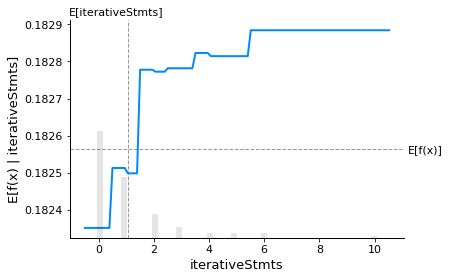

In [22]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

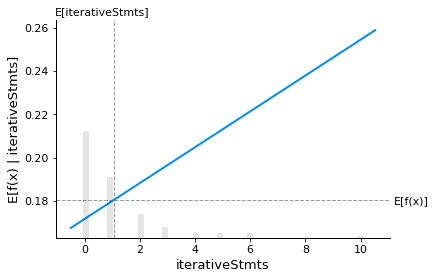

In [23]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

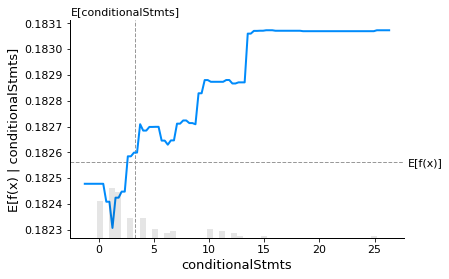

In [24]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

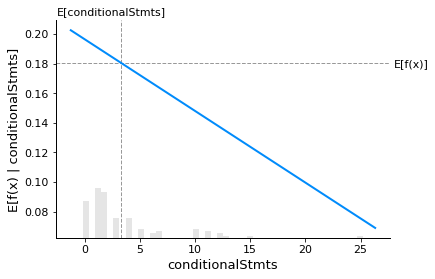

In [25]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

### Target 4 Prop Stat Compiled

In [16]:
# Lets remove the non numerical fields as they are not useful for the model
df_new = df.drop(['CompositeKey', 'Project', 'MethodName', 'MethodIndex'], axis=1)

df_new.info() 

# We will filter out all rows which have a numLines < 10, we also want to only look at rows with sensible npath & avedefdistuse values
df_new = df_new[(df_new.numLines > 10) & (df_new.npath > -1)]

df_new.info()

targetName="PropStatCompiled"

featureNames=df_new.columns[df_new.columns != targetName]

X = df_new[featureNames]

y = df_new[targetName]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   numLines                    2157 non-null   int64  
 1   numStatements               2157 non-null   int64  
 2   EditDensity                 2157 non-null   float64
 3   AveUseDefDist               2157 non-null   float64
 4   NotDeclared                 2157 non-null   int64  
 5   AveUseDefDist/MethodLength  2157 non-null   float64
 6   MedDefUseDist               2157 non-null   float64
 7   MedUseDefDist/MethodLength  2157 non-null   float64
 8   CountLine                   2157 non-null   int64  
 9   CompiledLine                2157 non-null   int64  
 10  PassedLine                  2157 non-null   int64  
 11  CountStat                   2157 non-null   int64  
 12  CompiledStat                2157 non-null   int64  
 13  PassedStat                  2157 

In [18]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [20]:
model_rf = RandomForestRegressor(n_estimators = 100)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
print("Prop Line Compiled Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model_lr.coef_[i].round(4))

Prop Line Passed Model coefficients:

numLines = -0.0004
numStatements = -0.0006
EditDensity = -0.0001
AveUseDefDist = -0.0001
NotDeclared = -0.0065
AveUseDefDist/MethodLength = 0.0097
MedDefUseDist = -0.0003
MedUseDefDist/MethodLength = -0.0079
CountLine = 0.0002
CompiledLine = -0.0128
PassedLine = 0.0254
CountStat = 0.0002
CompiledStat = 0.0035
PassedStat = -0.0092
PropLineCompiled = 0.5725
PropStatCompiled = -0.1639
PropStatPassed = 0.3617
cyclomatic = 0.0002
ncss = 0.0014
npath = 0.0
cyc/length = -0.0031
ncss/length = -0.0289
npath/length = -0.0001
InstCoverage-missed = 0.0001
InstCoverage-covered = -0.0001
InstCoverage = 0.0134
surfaceIfs = -0.0017
nestedIfs = -0.0014
surfaceSwitches = 0.0055
nestedSwitches = -0.0011
surfaceFors = 0.0097
nestedFors = 0.008
surfaceForEachs = 0.007
nestedForEachs = 0.004
surfaceWhiles = 0.0002
nestedWhiles = -0.0084
surfaceDos = -0.0453
nestedDos = 0.0177
iterativeStmts = -0.0072
conditionalStmts = 0.0013


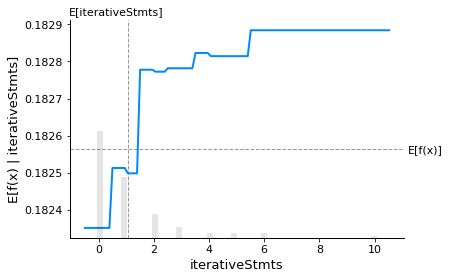

In [22]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

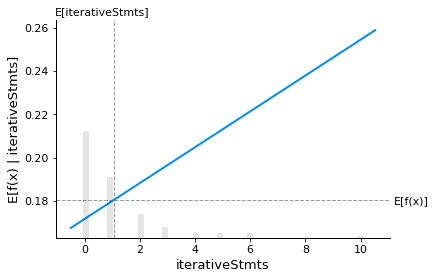

In [23]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "iterativeStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

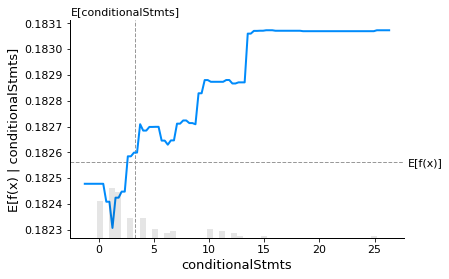

In [24]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_rf.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

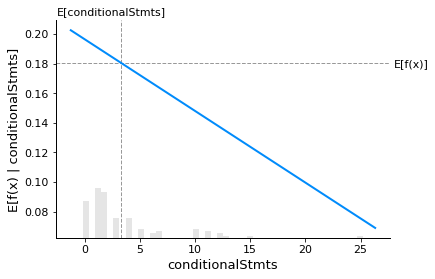

In [25]:
X100 = shap.utils.sample(X_train, 100)
shap.plots.partial_dependence(
    "conditionalStmts", model_lr.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)